In [1]:
import ode

# Classwork 11: Implementing ODE Methods
Morgan Holve
13 November 2018


The aim of this notebook is to solve a differential equation of the form    
$$x'(t) = v(t)$$
$$v'(t) = -x(t)$$
with intital conditions $x(0) = 1$, $v(0) = 0$.

We would like to show that $x(t) = \cos(t)$ and $v(t) = -\sin(t)$ is a solution to the above system. We will do this by applying four different methods of solving differential equations to the system. Once graphed, each should resemble a sine and cosine wave.

Solving such equations do actually have a physical application and therefore purpose. They could be relative in oscillating systems, like a spring or pendulum, that have periodic motion over time.

## Solutions
We will now graph the solutions of each method together to verify that their solutions are indeed sine and cosine waves.

### Euler's Method
We will first begin with Euler's method, which is as follows:
$$u_{k+1} = u_k + \Delta t\, f[t_k, u_k]$$
Where the function $f$ is the slope defined as $f_k = \frac{u_k-u_{k-1}}{t_k-t_{k-1}}$  taken over the interval $(t_0, t_1,...,t_k)$.

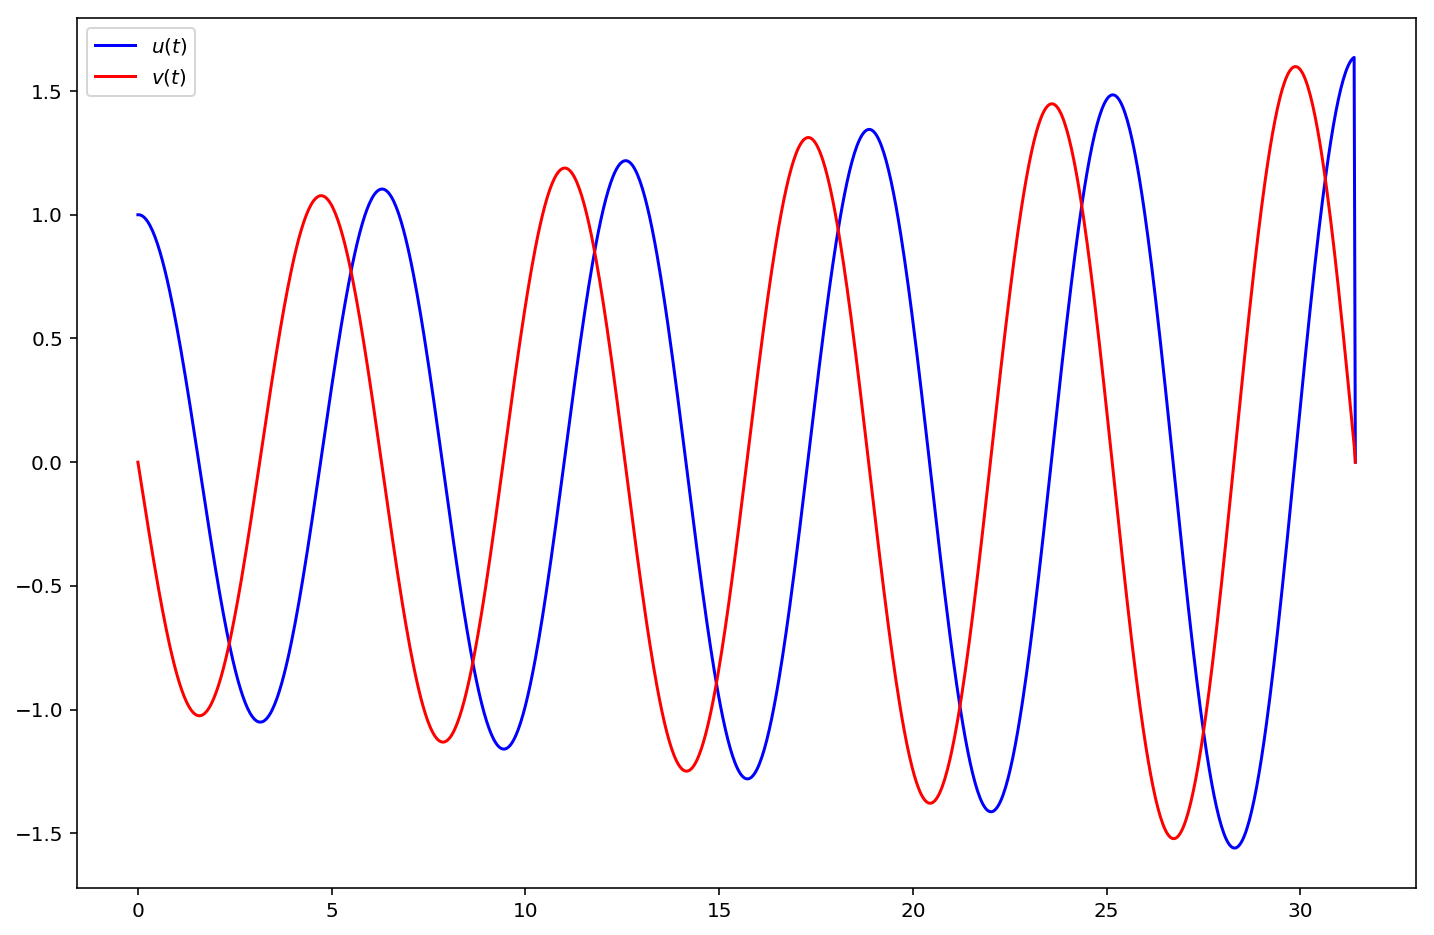

In [2]:
ode.euler()

Here, we see very obviously that our solutions are accurate. However, the approximation itself is not, as we can see this is whatever the opposite of damped oscaillation is (ie it grows as $t \to \infty$. Furthermore, the $u(t)$ approximation appears to fall apart at $t=5(2\pi)$, so this approximation may not be as accurate at larger values of $t$.

### Huen's Method
We will move next to Huen's method, which contains two separate steps. The first is Euler's method:
$$\tilde{u}_{k+1} = u_k + \Delta t\, f[t_k, u_k]$$, 

The second adds this approximated value to another trapizodial approximation to achieve the solutions:
$$u_{k+1} = u_k + (\Delta t/2)(f[t_k, u_k] + f[t_{k+1}, \tilde{u}_{k+1}])$$

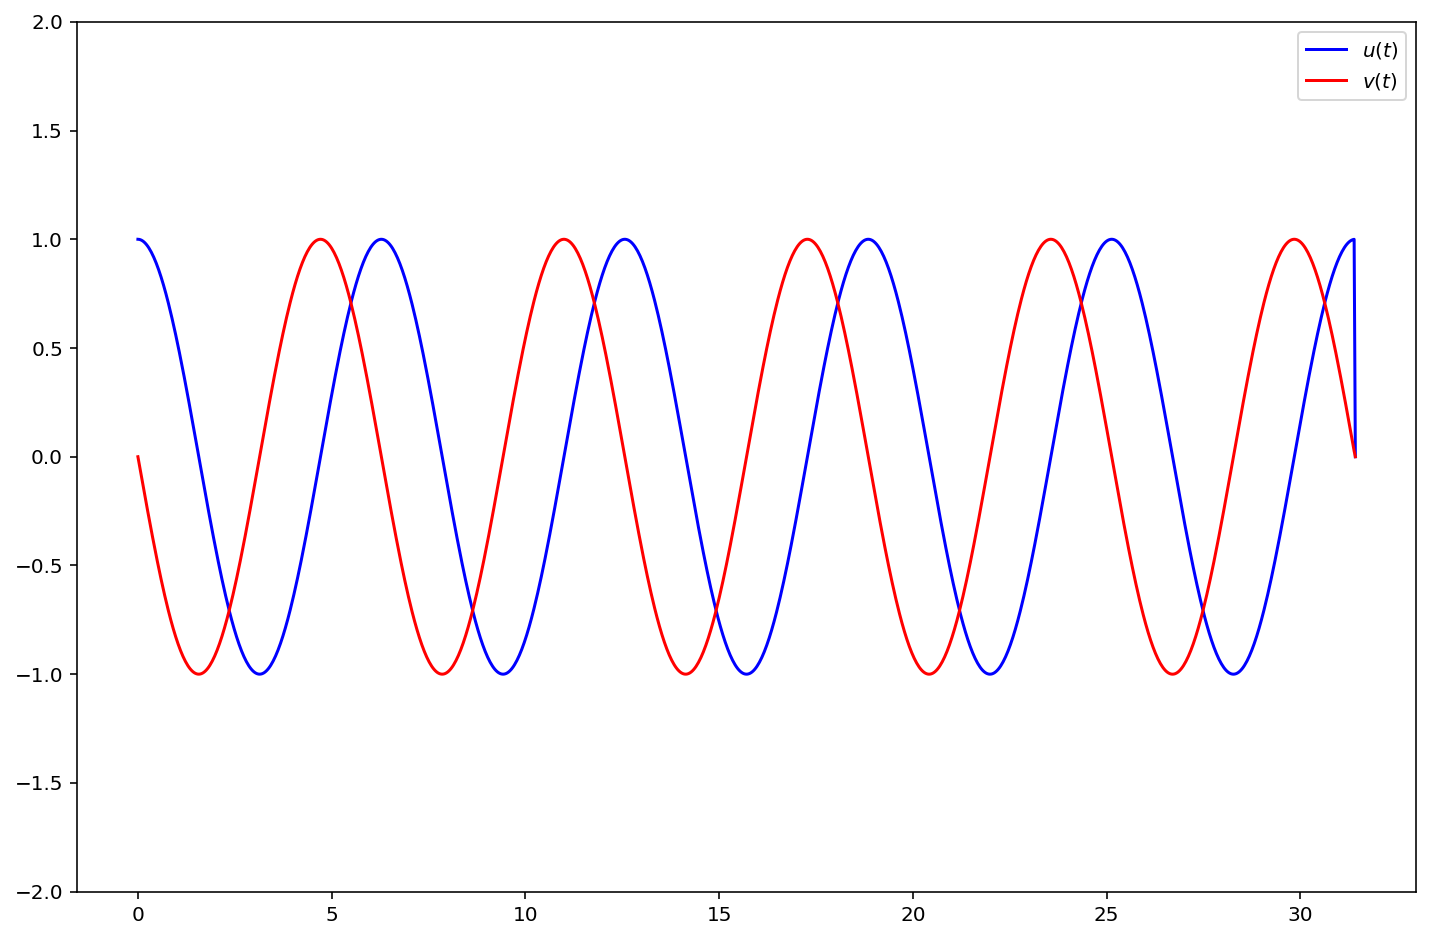

In [3]:
ode.huen()

From this, we see that it oscillates to a single value rather than growing each time. However, this value is not $(-1,1)$, but is a little above or below the range. Furthermore, we still see a problem at the upper bound. Furthermore, the period is not yet $2\pi$ for either function.

### 2nd-order Runge-Kutta Method
For this method, we first define two K values, the first being 
$$K_1 = \Delta t\, f[t_k, u_k]$$
Which closely correlates to Euler's method. However, this is made further accurate with the second K value, defined as
$$K_2 = \Delta t\, f[t_k + \Delta t/2, u_k + K_1/2]$$
Which further adds accuracy to the above method. This approximation is then used to gain the next $u_k$ value by adding it to the current:
$$u_{k+1} = u_k + K_2$$, 

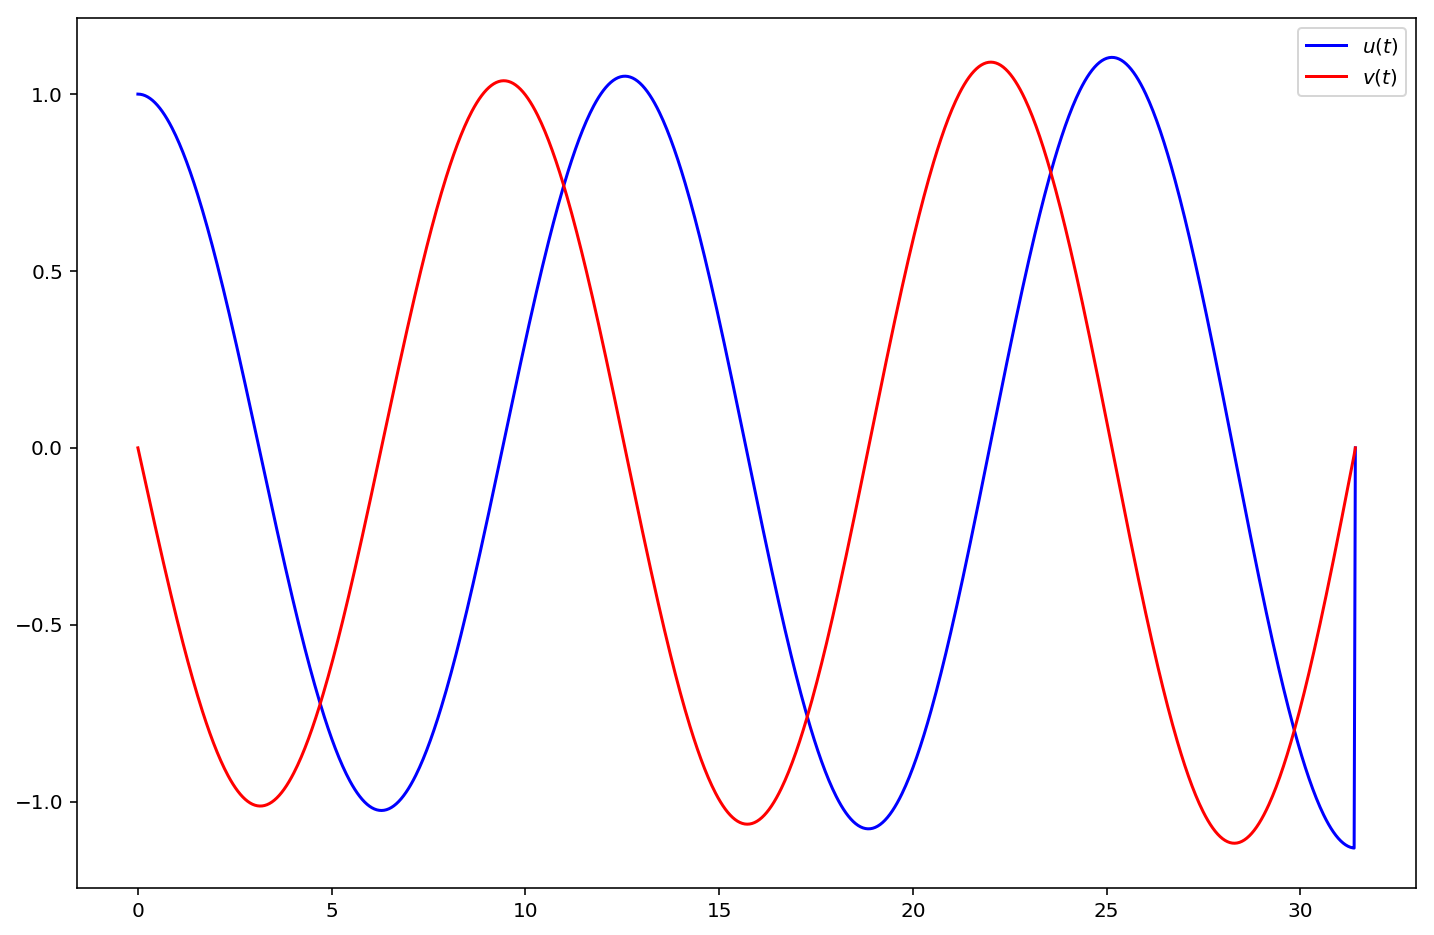

In [4]:
ode.rk2()

We can see that this method is much more accurate. Both waves range between $(-1,1)$ like we expect them to. However, the $u(t)$ still falls apart at $t = 5(2\pi)$ as it still produces a completely straight line.

### 4th-order Runge-Kutta Method
This method follows similarly from the 2nd order version, extended to the 4th order:
   $K_1 = \Delta t\,f[t_k,u_k]$, 
   
   $K_2 = \Delta t\, f[t_k + \Delta t/2, u_k + K_1/2]$, 
   
   $K_3 = \Delta t\, f[t_k + \Delta t/2, u_k + K_2/2]$, 
   
   $K_4 = \Delta t\,f[t_k + \Delta t, u_k + K_3]$  
   
These values are then averaged and added to the original $u_k$ value:
$u_{k+1} = u_k + (K_1 + 2K_2 + 2K_3 + K_4)/6$

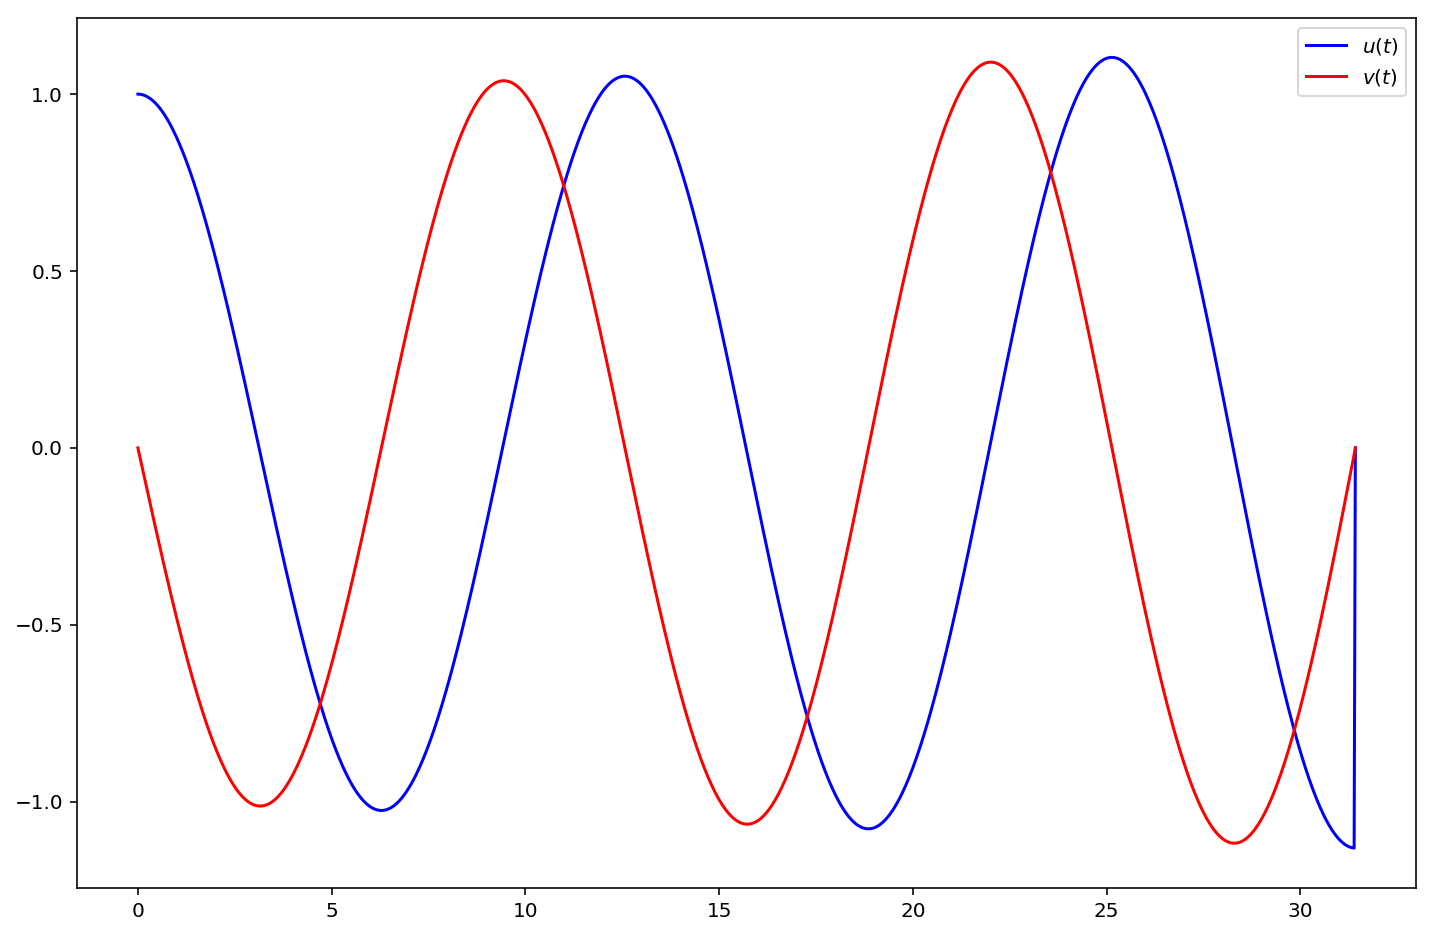

In [5]:
ode.rk4()

This graph looks almost identical to the 2nd order, mostly because the 4th derivatives are the same as the second derivatives. We still see the problem at the upper end of the domain. I should probably look into that.